<a href="https://colab.research.google.com/github/arihantdaga/ATM90E36_Arduino/blob/master/CelciusToFarhenhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Celcius to Farhenheight COnversion, If i dint know a formula**
This is preety cool, i dont have to know any formula, Physicists, who once had to work a great deal of time to come up with special equations and constants dont have to do that any longer.. Well Maybe.. ;)
Lets get started. 

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
celcius_q = np.array([-40, -20, -10, 0, 12, 19, 25, 32, 40, 49, 61, 80 ], dtype=float)
fahrenheit_a = np.array([ -40, -4, 14, 32, 53.6, 66.2, 77, 89.6, 104, 120.2, 141.8, 176], dtype=float)
# celcius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype= float)

**Model Definition**

In [0]:
model = tf.keras.Sequential()
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model.add(l0)
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

**Training**

In [60]:
print("Starting training the model")
history = model.fit(celcius_q, fahrenheit_a, epochs = 5000, verbose = False)
print("Training Model Finished")

Starting training the model
Training Model Finished


**Displaying Statictistics**

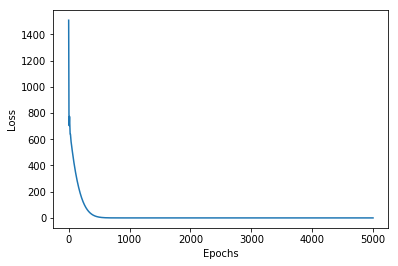

In [61]:
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"])


**Prediction Time - The Judgement Day**


In [62]:
cels = [16, 23,76,100, 130, 1000]
def celcius_to_far(number):
    return number*9/5 + 32
fars = list(map(celcius_to_far, cels))
print("Actual Value for celcius to farhenheits are ")
print("Celcius ", cels)
print("Fahrs ", fars)
print("Predicted Values for cels - ")
for i in range(len(cels)):
  print(model.predict([cels[i]]))
  

Actual Value for celcius to farhenheits are 
Celcius  [16, 23, 76, 100, 130, 1000]
Fahrs  [60.8, 73.4, 168.8, 212.0, 266.0, 1832.0]
Predicted Values for cels - 
[[60.799995]]
[[73.399994]]
[[168.8]]
[[212.00002]]
[[266.00003]]
[[1832.0004]]


In [63]:
print("layer Variables after training: {}".format(l0.get_weights()))

layer Variables after training: [array([[1.8000003]], dtype=float32), array([31.99999], dtype=float32)]


**Hurray...** The variables of the equation are 1.8 and 31.99. And actual variables are 1.8 and 32 . So it learned it right. Well, close to right :P. I still think this is wonderfull enough. 

**Some important Learning from this little project**
The actual results can vary drastically depending on your dataset, and sometimes, just increasing the amount of data is not enough if the quality of data is not good. For example -
The original tutor used this dataset in the demo video - Lets call it dataset 1.


```
celcius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype= float)
```
With this dataset even after 500 epochs the results were pretty close. 
However, i decided to choose a different dataset like this one . Lets call it dataset 2


```
celcius_q = np.array([-40, -20, -10, 0, 12, 19, 25, 32, 40, 49, 61, 80 ], dtype=float)
fahrenheit_a = np.array([ -40, -4, 14, 32, 53.6, 66.2, 77, 89.6, 104, 120.2, 141.8, 176], dtype=float)
```
I thought i have more data points and they are also spread in large area, so maybe it should perform better. But **Surprisingly** When i trained the model on this dataset and ran for 500 epochs, the data was far away from actual value in the prediction test. So i had to increase the epochs to 1000. After that it came close to actual values. 

**However** After 1000 epochs, increasing epochs to say 5000 wont help the model for the dataset 1and  actually reduce the accuracy on test set. But in case of dataset 2, the accuracy is increased on increasing number of epochs to 5000. 
